In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
sns.set()

In [8]:
resnet50 = pd.read_csv('/Users/snehpandya/Projects/NN Scaling/scripts/text_logs/resnet50.txt',sep="\t", index_col=False).to_numpy()
wideresnet50 = pd.read_csv('/Users/snehpandya/Projects/NN Scaling/scripts/text_logs/wide_resnet50.txt',sep="\t", index_col=False).to_numpy()
VGG = pd.read_csv('/Users/snehpandya/Projects/NN Scaling/scripts/text_logs/VGG.txt',sep="\t", index_col=False).to_numpy()
densenet = pd.read_csv('/Users/snehpandya/Projects/NN Scaling/scripts/text_logs/densenet.txt',sep="\t", index_col=False).to_numpy()
inception = pd.read_csv('/Users/snehpandya/Projects/NN Scaling/scripts/text_logs/inception.txt',sep="\t", index_col=False).to_numpy()

In [9]:
def func(x, A, a, c):
    ans = A*x**a + c
    return ans

resnet50[0,0] = 1e-8
wideresnet50[0,0] = 1e-8
VGG[0,0] = 1e-8
densenet[0,0] = 1e-8
inception[0,0] = 1e-8


popt1, pcov1 = curve_fit(func, resnet50[:,0], resnet50[:,1])
popt2, pcov2 = curve_fit(func, wideresnet50[:,0], wideresnet50[:,1])
popt3, pcov3 = curve_fit(func, VGG[:,0], VGG[:,1])
popt4, pcov4 = curve_fit(func, densenet[:,0], densenet[:,1])
popt5, pcov5 = curve_fit(func, inception[:,0], inception[:,1])

print(popt1[1],popt2[1],popt3[1],popt4[1],popt5[1])

6.305250504080412 2.0939422988842114 8.344786118650848 1.5491350419811893 4.281898231340824


In [12]:
resnet50[:]

array([[1.000e-08, 3.210e-04],
       [1.000e+00, 3.640e-04],
       [2.000e+00, 6.120e-04],
       [3.000e+00, 9.570e-04],
       [4.000e+00, 2.350e-03],
       [5.000e+00, 1.310e-02],
       [6.000e+00, 3.909e-02]])

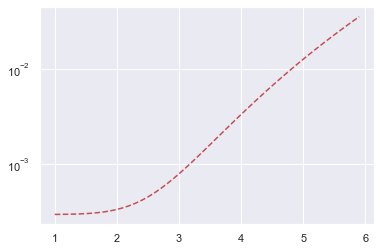

In [14]:
plt.plot(np.arange(1,6,.1),func(np.arange(1,6,.1), *popt1), 'r--', label="resnet50 Fitted Curve")
plt.yscale('log')

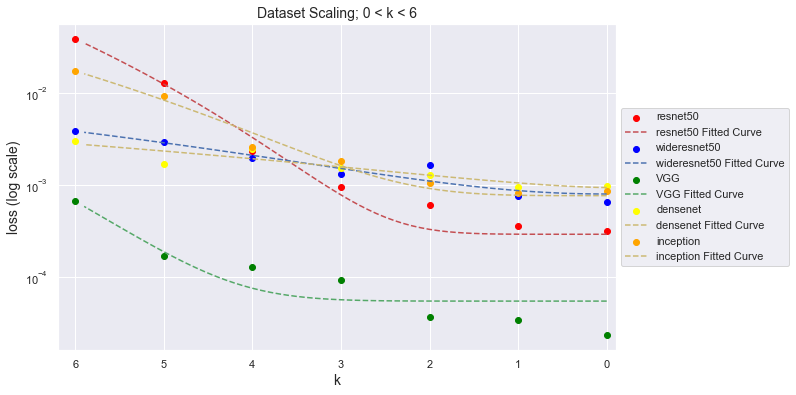

In [22]:
plot_min, plot_max = 0, 6
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(resnet50[:,0],resnet50[:,1], label = 'resnet50', color='red')
plt.plot(np.arange(plot_min,plot_max,.1),func(np.arange(plot_min,plot_max,.1), *popt1), 'r--', label="resnet50 Fitted Curve")

ax.scatter(wideresnet50[:,0], wideresnet50[:,1], label = 'wideresnet50', color='blue')
plt.plot(np.arange(plot_min,plot_max,.1), func(np.arange(plot_min,plot_max,.1), *popt2), 'b--', label="wideresnet50 Fitted Curve")

ax.scatter(VGG[:,0], VGG[:,1], label = 'VGG', color='green')
plt.plot(np.arange(plot_min,plot_max,.1), func(np.arange(plot_min,plot_max,.1), *popt3), 'g--', label="VGG Fitted Curve")

ax.scatter(densenet[:,0], densenet[:,1], label = 'densenet', color='yellow')
plt.plot(np.arange(plot_min,plot_max,.1), func(np.arange(plot_min,plot_max,.1), *popt4), 'y--', label="densenet Fitted Curve")

ax.scatter(inception[:,0], inception[:,1], label = 'inception', color='orange')
plt.plot(np.arange(plot_min,plot_max,.1), func(np.arange(plot_min,plot_max,.1), *popt5), 'y--', label="inception Fitted Curve")

ax.set_xlim(6.2, -.1)
ax.set_xlabel('k', fontsize=14)
ax.set_yscale('log')
ax.set_ylabel('loss (log scale)', fontsize=14)
ax.set_title('Dataset Scaling; 0 < k < 6', fontsize=14)
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()